# Logistic Regression: 직원들의 승진 가능성 예측모델 만들기

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
url = 'https://github.com/DSNote/fastcampus/raw/main/hr.csv'

## 데이터 살펴보기

In [175]:
hr_df = pd.read_csv(url)
hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [176]:
hr_df = hr_df.drop('employee_id', axis=1)

In [177]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.0+ MB


In [178]:
hr_df.describe(include='all')

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000


In [179]:
hr_df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

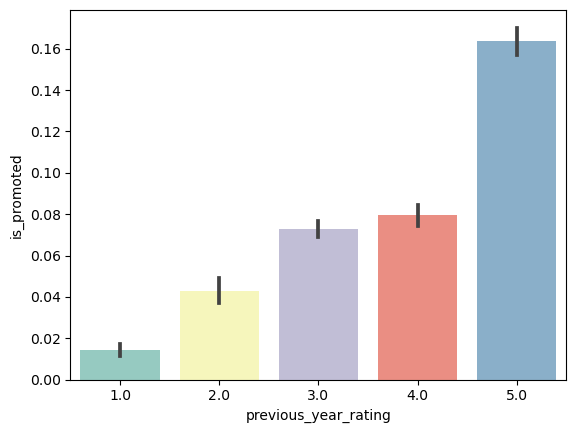

In [180]:
sns.barplot(data=hr_df, x='previous_year_rating', y='is_promoted', palette='Set3')
plt.show()

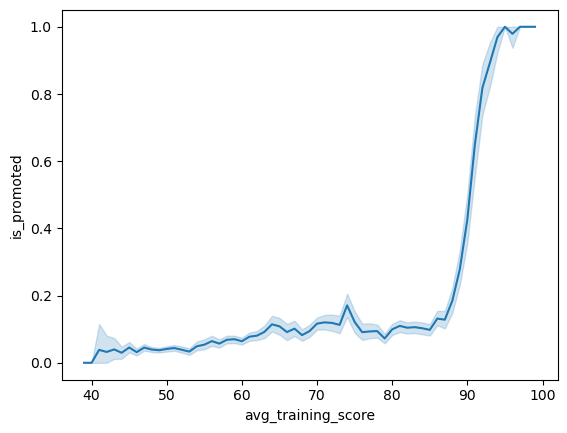

In [181]:
sns.lineplot(data=hr_df, x='avg_training_score', y='is_promoted')
plt.show()

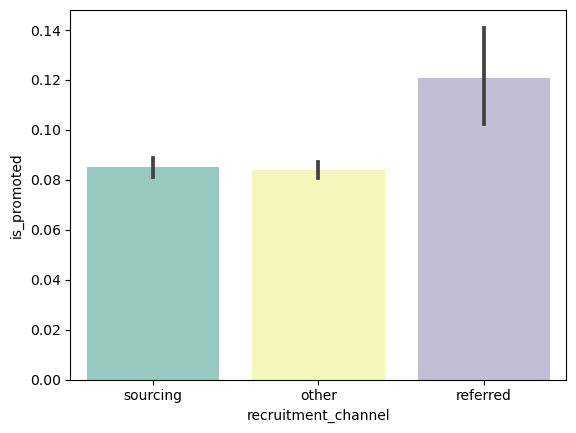

In [182]:
sns.barplot(data=hr_df, x='recruitment_channel', y='is_promoted', palette='Set3')
plt.show()

In [183]:
hr_df['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

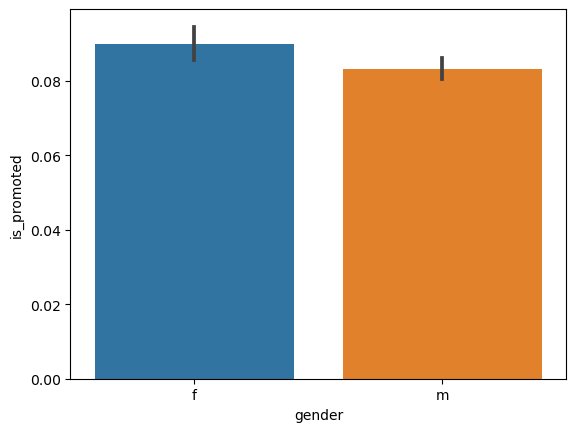

In [184]:
sns.barplot(data=hr_df, x='gender', y='is_promoted')
plt.show()

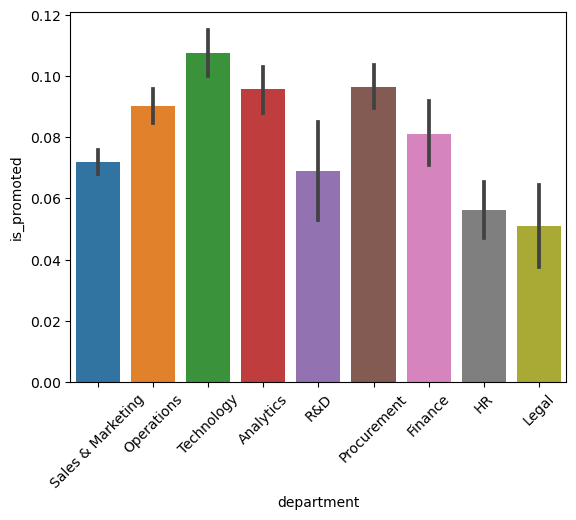

In [185]:
sns.barplot(data=hr_df, x='department', y='is_promoted')
plt.xticks(rotation=45)
plt.show()

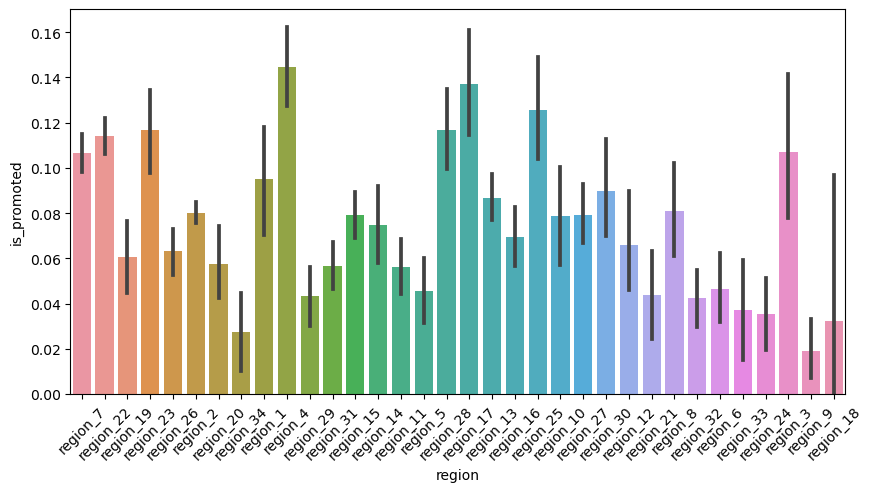

In [186]:
plt.figure(figsize=(10,5))
sns.barplot(data=hr_df, x='region', y='is_promoted')
plt.xticks(rotation=45)
plt.show()

In [187]:
corr = hr_df.corr(numeric_only=True)
corr

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.063126,-0.057275,-0.007628,0.042517,-0.024896
age,-0.081278,1.000000,0.006008,0.657111,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.063126,0.006008,1.000000,0.000253,0.027738,0.075139,0.159320
length_of_service,-0.057275,0.657111,0.000253,1.000000,-0.039927,-0.038122,-0.010670
awards_won?,-0.007628,-0.008169,0.027738,-0.039927,1.000000,0.072138,0.195871
avg_training_score,0.042517,-0.048380,0.075139,-0.038122,0.072138,1.000000,0.181147
is_promoted,-0.024896,-0.017166,0.159320,-0.010670,0.195871,0.181147,1.000000


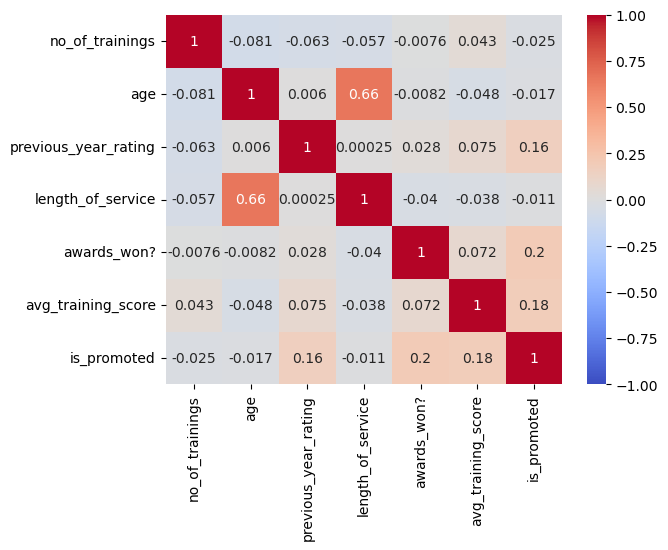

In [188]:
sns.heatmap(data=corr, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

## 결측치 처리

In [189]:
hr_df.isna().mean()

department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [190]:
hr_df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [191]:
hr_df['education'] = hr_df['education'].fillna('unknown')

In [192]:
hr_df['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [193]:
hr_df.isnull().any(axis=1).sum()

4124

In [194]:
hr_df[hr_df.isnull().any(axis=1)]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,unknown,m,sourcing,1,30,NaN,1,0,77,0
23,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,70,0
29,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,44,0
56,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,49,0
58,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54703,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,0,88,0
54734,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,0,56,1
54746,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,0,61,0
54773,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,0,61,0


In [195]:
hr_df = hr_df.dropna()
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50684 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            50684 non-null  object 
 1   region                50684 non-null  object 
 2   education             50684 non-null  object 
 3   gender                50684 non-null  object 
 4   recruitment_channel   50684 non-null  object 
 5   no_of_trainings       50684 non-null  int64  
 6   age                   50684 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     50684 non-null  int64  
 9   awards_won?           50684 non-null  int64  
 10  avg_training_score    50684 non-null  int64  
 11  is_promoted           50684 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.0+ MB


In [196]:
hr_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [197]:
for o_series in hr_df.columns[hr_df.dtypes=='object']:
    print(o_series, hr_df[o_series].nunique())

department 9
region 34
education 4
gender 2
recruitment_channel 3


In [198]:
hr_df = pd.get_dummies(hr_df, columns=hr_df.columns[hr_df.dtypes=='object'])
hr_df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,0,49,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1,30,5.0,4,0,60,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1,34,3.0,7,0,50,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,2,39,1.0,10,0,50,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,1,45,3.0,2,0,73,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


## 모델링

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(hr_df.drop('is_promoted', axis=1), hr_df['is_promoted'], test_size=0.3, random_state=100)

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
lr = LogisticRegression()

In [203]:
lr.fit(X_train, y_train)

C:\Users\dukim\miniconda3\envs\bootcamp\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [204]:
y_pred = lr.predict(X_test)

In [205]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.9218729448901749

In [206]:
print(confusion_matrix(y_test, y_pred))

[[13805   108]
 [ 1080   213]]


## Logistic Regression

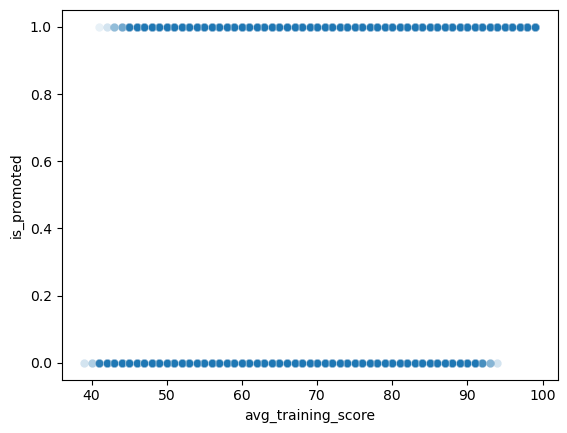

In [207]:
sns.scatterplot(data=hr_df, x='avg_training_score', y='is_promoted', alpha=0.1)
plt.show()

## 해석: 임의 데이터와 함께

In [208]:
lr.coef_

array([[-1.25589764e-01, -7.84175184e-02,  4.15130272e-01,
         4.89558872e-02,  2.97896210e+00,  9.06937512e-02,
        -1.58945925e+00, -1.35684882e-01, -2.56111833e-01,
        -2.70821928e-01,  3.30398403e-01, -3.81627456e-01,
        -1.25940498e+00,  1.21366592e+00, -1.14000945e+00,
        -1.03181216e-01, -2.01613939e-01, -5.11701460e-01,
        -2.83211158e-01,  2.04171158e-02, -1.12148303e-01,
        -5.30877430e-02, -2.17288368e-01,  4.25920718e-01,
        -2.94203181e-03, -1.09558812e-01,  1.54871571e-01,
        -3.75353144e-01, -1.66921244e-01,  3.31543893e-01,
         3.14592422e-01, -3.26605907e-01,  2.91987759e-01,
        -5.05782332e-01, -1.49636531e-01,  2.31576790e-01,
        -5.38149267e-01,  5.75209353e-02, -1.86107556e-01,
        -4.84586298e-01, -5.41570880e-01, -1.63999731e-01,
        -1.77512869e-01,  7.65226516e-01, -3.79346700e-01,
        -3.59578354e-01,  4.17810403e-01, -1.95050916e-01,
        -3.55588831e-01, -9.88653814e-01, -7.54105606e-0

In [209]:
temp_X = hr_df[['age', 'length_of_service']]
temp_y = hr_df['is_promoted']

In [210]:
temp_lr = LogisticRegression()

In [211]:
temp_lr.fit(temp_X, temp_y)

LogisticRegression()

In [212]:
temp_df = pd.DataFrame({'age':[20,21,22], 'length_of_service':[10,15,20]})
temp_df

,age,length_of_service
0,20,10
1,21,15
2,22,20


In [213]:
y_pred = temp_lr.predict_proba(temp_df)

In [214]:
y_pred

array([[0.90188998, 0.09811002],
       [0.90276342, 0.09723658],
       [0.90362992, 0.09637008]])

In [215]:
coef_1, coef_2= temp_lr.coef_[0][0], temp_lr.coef_[0][1]
print(coef_1, coef_2)
inter = temp_lr.intercept_[0]
print(inter)

-0.01002315291388233 2.2523304123380485e-05
-2.0181652301736057


In [216]:
1/ (1+ np.exp(inter + coef_1*temp_df['age'] + coef_2*temp_df['length_of_service']))

0    0.901890
1    0.902763
2    0.903630
dtype: float64

## Cross Validation

In [217]:
from sklearn.model_selection import KFold

In [226]:
kf = KFold(n_splits=5, shuffle=True, random_state=100)
kf

KFold(n_splits=5, random_state=100, shuffle=True)

In [227]:
hr_df.info() # 행의 수와 index번호가 다름

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50684 entries, 0 to 54807
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               50684 non-null  int64  
 1   age                           50684 non-null  int64  
 2   previous_year_rating          50684 non-null  float64
 3   length_of_service             50684 non-null  int64  
 4   awards_won?                   50684 non-null  int64  
 5   avg_training_score            50684 non-null  int64  
 6   is_promoted                   50684 non-null  int64  
 7   department_Analytics          50684 non-null  uint8  
 8   department_Finance            50684 non-null  uint8  
 9   department_HR                 50684 non-null  uint8  
 10  department_Legal              50684 non-null  uint8  
 11  department_Operations         50684 non-null  uint8  
 12  department_Procurement        50684 non-null  uint8  
 13  d

In [242]:
kf_iter = kf.split(range(len(hr_df)))
kf_iter

<generator object _BaseKFold.split at 0x0000025FB4840C10>

In [243]:
X = hr_df.drop('is_promoted', axis=1)
y = hr_df['is_promoted']
acc_list = []
for train_index,test_index in kf_iter:
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    # print(accuracy_score(y_test, pred))
    acc_list.append(accuracy_score(y_test, pred))
sum(acc_list)/5.0

C:\Users\dukim\miniconda3\envs\bootcamp\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dukim\miniconda3\envs\bootcamp\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

0.923545958256651

In [244]:
acc_list

[0.9206865936667653,
 0.9243365887343395,
 0.9237446976423005,
 0.9220676728815231,
 0.9268942383583267]